In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation
# Plot en 3D
from mpl_toolkits.mplot3d import axes3d

In [2]:
Xmin, Xmax, Npoints_x = 0.,2.,10
Tmin, Tmax, Npoints_t = 0.,4.,300

x = np.linspace(Xmin,Xmax, Npoints_x)
t = np.linspace(Tmin,Tmax, Npoints_t)

deltat = (Tmax-Tmin)/(Npoints_t-1)
deltax = (Xmax-Xmin)/(Npoints_x-1)


# Velocidad de la onda

v = 2.
lambda_ = v*deltat/deltax
print(lambda_)

0.120401337793


In [3]:
# Definamos condiciones iniciales

def ui(x):
    return 0.
    return np.sin(np.pi*x)

# fronteras movil
def h1(t):
    return 0.4*np.sin(2*np.pi*t)

In [4]:
# Definimos la forma de la onda

u = np.zeros((Npoints_t,Npoints_x))
u[0,:] = ui(x)

print(u[0,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Termino de absorcion:

$$ -\gamma \frac{du}{dt} $$ 

In [5]:
# Calculamos solucion

gamma = 0.5*deltat

for l in range(1,len(t)):
    
    if(l==1):
        u[l,:] = u[l-1,:] # v = 0
    else:
        
        # Frontera Movil
        u[l,-1] = h1(t[l])
        
        for i in range(1,len(x)-1):
            u[l,i] = 2.*(1.-lambda_**2)*u[l-1,i] \
            +lambda_**2*(u[l-1,i+1]+u[l-1,i-1]) \
            - u[l-2,i] \
            ##-gamma*u[l-1,i] + gamma*u[l-2,i] 

<IPython.core.display.Javascript object>


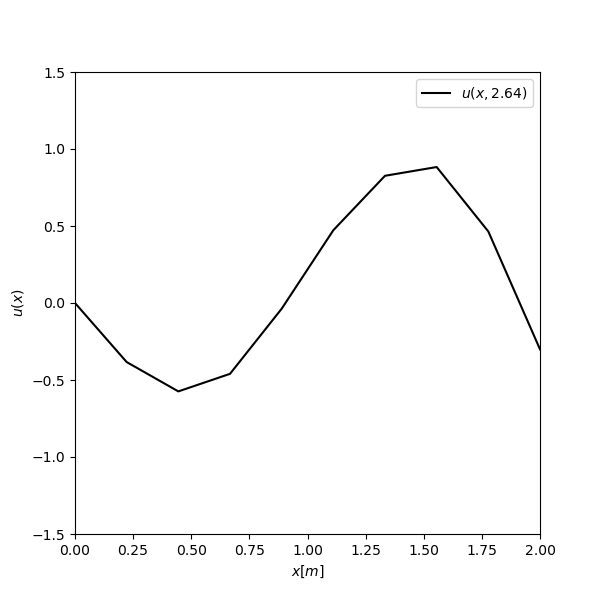

In [7]:
Nframes = len(t)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(Xmin,Xmax)
    ax.set_ylim(-1.5,1.5)
    
    ax.set_xlabel(r'$x[m]$', fontsize=10)
    ax.set_ylabel(r'$u(x)$', fontsize=10) 
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x,u[i,:], color='k', label=r'$u(x,%.2f)$' %(t[i]))
    plot = plt.legend(loc=0)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=Nframes, init_func=init)